In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# linear data

In [2]:
X=np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y=np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

The reason we're working with numpy arrays is to make the matrix operations faster because they use less memory than Python lists

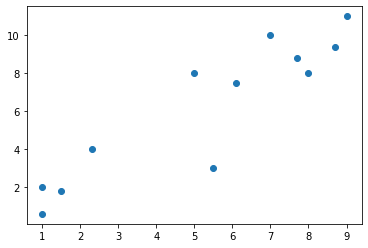

In [4]:
# show unclassified data
plt.scatter(X,y)
plt.show()

Keep in mind that this is a really simple dataset, so most of the time you'll need to do some work on your data to get it to a usable state.

In [16]:
# shaping data for training the model
train_X=np.vstack((X,y)).T
train_X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ],
       [ 7. , 10. ],
       [ 8.7,  9.4],
       [ 2.3,  4. ],
       [ 5.5,  3. ],
       [ 7.7,  8.8],
       [ 6.1,  7.5]])

In [12]:
train_y=[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
train_y

[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [29]:
# define the model
clf=svm.SVC(kernel='linear',C=1.0)

That one line of code just created an entire machine learning model. Now we just have to train it with the data we pre-processed.

In [30]:
clf.fit(train_X, train_y)

SVC(kernel='linear')

In [32]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]
w

array([0.1332713 , 0.42667492])

In [33]:
# get the y-offset for the linear equation
a = -w[0] / w[1]
a = -w[0] / w[1]
a

-0.3123485705652896

In [34]:
# make the x-axis space for the data points
XX = np.linspace(0, 13)
XX

array([ 0.        ,  0.26530612,  0.53061224,  0.79591837,  1.06122449,
        1.32653061,  1.59183673,  1.85714286,  2.12244898,  2.3877551 ,
        2.65306122,  2.91836735,  3.18367347,  3.44897959,  3.71428571,
        3.97959184,  4.24489796,  4.51020408,  4.7755102 ,  5.04081633,
        5.30612245,  5.57142857,  5.83673469,  6.10204082,  6.36734694,
        6.63265306,  6.89795918,  7.16326531,  7.42857143,  7.69387755,
        7.95918367,  8.2244898 ,  8.48979592,  8.75510204,  9.02040816,
        9.28571429,  9.55102041,  9.81632653, 10.08163265, 10.34693878,
       10.6122449 , 10.87755102, 11.14285714, 11.40816327, 11.67346939,
       11.93877551, 12.20408163, 12.46938776, 12.73469388, 13.        ])

In [38]:
# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

array([7.06178311, 6.9661662 , 6.87054929, 6.77493239, 6.67931548,
       6.58369857, 6.48808166, 6.39246475, 6.29684784, 6.20123093,
       6.10561402, 6.00999711, 5.9143802 , 5.81876329, 5.72314638,
       5.62752947, 5.53191256, 5.43629565, 5.34067874, 5.24506184,
       5.14944493, 5.05382802, 4.95821111, 4.8625942 , 4.76697729,
       4.67136038, 4.57574347, 4.48012656, 4.38450965, 4.28889274,
       4.19327583, 4.09765892, 4.00204201, 3.9064251 , 3.8108082 ,
       3.71519129, 3.61957438, 3.52395747, 3.42834056, 3.33272365,
       3.23710674, 3.14148983, 3.04587292, 2.95025601, 2.8546391 ,
       2.75902219, 2.66340528, 2.56778837, 2.47217146, 2.37655455])

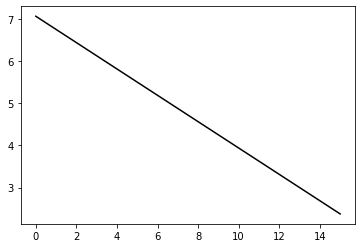

In [39]:
# plot the decision boundary
plt.plot(XX, yy, 'k-')

No handles with labels found to put in legend.


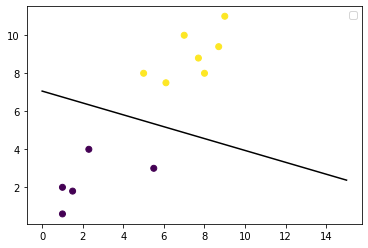

In [41]:
# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y)
plt.legend()
plt.show()

Non-Linear SVM Example

In [51]:
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [42]:
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [87]:
circle_X, circle_y=datasets.make_circles(n_samples=100, noise=0.05)

In [70]:
circle_X

array([[-0.71544838, -0.52742352],
       [-0.83402154, -0.55061799],
       [ 0.8104418 , -0.02391592],
       [-0.63762839,  0.47817087],
       [-0.7387139 ,  0.50691742],
       [ 0.17640209, -0.71568751],
       [ 0.32494912,  1.02418769],
       [ 0.31892275, -1.00934994],
       [ 0.21869382,  0.85510664],
       [ 0.97687397, -0.01701654]])

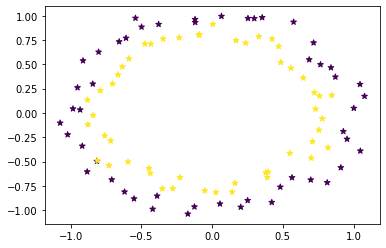

In [88]:
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='*')
plt.show()

This dataset doesn't need any pre-processing before we use it to train the model
In this case, we'll go with an RBF (Gaussian Radial Basis Function) kernel to classify this data. You could also try the polynomial kernel to see the difference between the results you get. Now it's time to train the model.

In [90]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [92]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [94]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

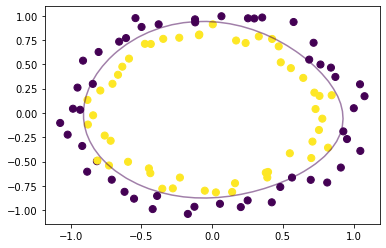

In [95]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()